In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
FILE_PATH = '/Users/ML/housing_Consolidated_Final.csv'

df = pd.read_csv(FILE_PATH)

df.describe()

,MonthlyInventory,Year,Month,YearlyCrimesReportedByArea
count,8131.000000,10021.000000,10021.000000,9672.000000
mean,6.069979,2005.562120,6.475501,1987.956576
std,3.513741,9.272728,3.461641,2488.516669
min,0.300000,1990.000000,1.000000,26.000000
25%,3.800000,1998.000000,3.000000,512.000000
50%,5.500000,2006.000000,6.000000,909.000000
75%,7.500000,2014.000000,9.000000,2066.000000
max,40.400000,2022.000000,12.000000,11788.000000


In [25]:
print(df.isnull().sum())

Sales                          707
DollarVolume                  1679
AveragePrice                  1679
MedianPrice                   1427
TotalListings                 1890
MonthlyInventory              1890
Year                             0
Month                            0
City/MSA                         0
YearlyCrimesReportedByArea     349
dtype: int64


In [30]:
df_clean = df.dropna()
print(df_clean.isnull().sum())

Sales                         0
DollarVolume                  0
AveragePrice                  0
MedianPrice                   0
TotalListings                 0
MonthlyInventory              0
Year                          0
Month                         0
City/MSA                      0
YearlyCrimesReportedByArea    0
dtype: int64


In [31]:
df_clean.dtypes

Sales                          object
DollarVolume                   object
AveragePrice                   object
MedianPrice                    object
TotalListings                  object
MonthlyInventory              float64
Year                            int64
Month                           int64
City/MSA                       object
YearlyCrimesReportedByArea    float64
dtype: object

In [32]:
df_clean['Sales'] = df_clean['Sales'].str.replace(',','', regex=True)
df_clean['DollarVolume'] = df_clean['DollarVolume'].str.replace(',','', regex = True)
df_clean['AveragePrice'] = df_clean['AveragePrice'].str.replace(',','', regex=True)
df_clean['MedianPrice'] = df_clean['MedianPrice'].str.replace(',','', regex=True)
df_clean['TotalListings'] = df_clean['TotalListings'].str.replace(',','', regex=True)
df_clean['Sales'] = df_clean['Sales'].apply(lambda x: float(x.split()[0].replace(',', '')))
df_clean

<ipython-input-32-bc694d5e561b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sales'] = df_clean['Sales'].str.replace(',','', regex=True)
<ipython-input-32-bc694d5e561b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DollarVolume'] = df_clean['DollarVolume'].str.replace(',','', regex = True)
<ipython-input-32-bc694d5e561b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Sales,DollarVolume,AveragePrice,MedianPrice,TotalListings,MonthlyInventory,Year,Month,City/MSA,YearlyCrimesReportedByArea
0,103.0,4791766,46522,56214,765,7.4,1990,1,Abilene,914.0
1,61.0,2945873,48293,66072,981,12.0,1990,2,Abilene,914.0
2,85.0,4218975,49635,62551,1042,12.6,1990,3,Abilene,914.0
3,95.0,4135730,43534,57094,1044,12.2,1990,4,Abilene,914.0
4,106.0,4803602,45317,56038,971,10.8,1990,5,Abilene,914.0
...,...,...,...,...,...,...,...,...,...,...
9630,192.0,31995472,166643,149200,275,1.8,2020,8,WichitaFalls,405.0
9631,203.0,34788764,171373,147000,266,1.7,2020,9,WichitaFalls,405.0
9632,168.0,27074231,161156,148950,278,1.7,2020,10,WichitaFalls,405.0
9633,128.0,23975171,187306,159450,223,1.4,2020,11,WichitaFalls,405.0


In [33]:
df_clean['Sales'].astype(str).astype(float)
df_clean['DollarVolume'] = df_clean['DollarVolume'].astype(str).astype(float)
df_clean['AveragePrice'] = df_clean['AveragePrice'].astype(str).astype(int)
df_clean['MedianPrice'] = df_clean['MedianPrice'].astype(str).astype(int)
df_clean['TotalListings'] = df_clean['TotalListings'].astype(str).astype(int)
# df_clean['Year'] = pd.to_datetime(df_clean['Year'])
# df_clean['Month'] = pd.to_datetime(df_clean['Month'])
df_clean['City/MSA'] = df_clean['City/MSA'].astype(str).astype(str)
df_clean

<ipython-input-33-aa8c086ae0eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DollarVolume'] = df_clean['DollarVolume'].astype(str).astype(float)
<ipython-input-33-aa8c086ae0eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AveragePrice'] = df_clean['AveragePrice'].astype(str).astype(int)
<ipython-input-33-aa8c086ae0eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Sales,DollarVolume,AveragePrice,MedianPrice,TotalListings,MonthlyInventory,Year,Month,City/MSA,YearlyCrimesReportedByArea
0,103.0,4791766.0,46522,56214,765,7.4,1990,1,Abilene,914.0
1,61.0,2945873.0,48293,66072,981,12.0,1990,2,Abilene,914.0
2,85.0,4218975.0,49635,62551,1042,12.6,1990,3,Abilene,914.0
3,95.0,4135730.0,43534,57094,1044,12.2,1990,4,Abilene,914.0
4,106.0,4803602.0,45317,56038,971,10.8,1990,5,Abilene,914.0
...,...,...,...,...,...,...,...,...,...,...
9630,192.0,31995472.0,166643,149200,275,1.8,2020,8,WichitaFalls,405.0
9631,203.0,34788764.0,171373,147000,266,1.7,2020,9,WichitaFalls,405.0
9632,168.0,27074231.0,161156,148950,278,1.7,2020,10,WichitaFalls,405.0
9633,128.0,23975171.0,187306,159450,223,1.4,2020,11,WichitaFalls,405.0


In [34]:
df_clean.dtypes

Sales                         float64
DollarVolume                  float64
AveragePrice                    int32
MedianPrice                     int32
TotalListings                   int32
MonthlyInventory              float64
Year                            int64
Month                           int64
City/MSA                       object
YearlyCrimesReportedByArea    float64
dtype: object

In [35]:
q1 = df_clean['AveragePrice'].quantile(0.25)
q3 = df_clean['AveragePrice'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
print('25th Percentile = ',q1)
print('75th Percentile = ', q3)
print('Interquartile range = ', iqr)

25th Percentile =  111108.5
75th Percentile =  187335.0
Interquartile range =  76226.5


In [36]:
df_clean.describe()

,Sales,DollarVolume,AveragePrice,MedianPrice,TotalListings,MonthlyInventory,Year,Month,YearlyCrimesReportedByArea
count,7519.000000,7.519000e+03,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000
mean,1113.265195,2.339114e+08,155573.337146,130273.274771,5586.041894,6.330549,2006.558053,6.503125,2177.511770
std,1894.277510,4.894235e+08,62627.352649,51539.658619,8985.503940,3.477682,8.897949,3.451247,2719.797044
min,17.000000,1.084933e+06,35242.000000,33722.000000,101.000000,0.600000,1990.000000,1.000000,26.000000
25%,113.000000,1.378430e+07,111108.500000,89865.500000,615.000000,4.100000,1999.000000,4.000000,495.000000
50%,198.000000,3.040226e+07,145627.000000,124000.000000,1148.000000,5.700000,2008.000000,7.000000,883.000000
75%,1260.500000,1.706767e+08,187335.000000,155000.000000,6832.500000,7.700000,2014.000000,10.000000,2391.000000
max,12855.000000,4.650350e+09,484932.000000,365042.000000,50548.000000,40.400000,2020.000000,12.000000,11788.000000


In [37]:
q1 = df_clean['MedianPrice'].quantile(0.25)
q3 = df_clean['MedianPrice'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
print('25th Percentile = ',q1)
print('75th Percentile = ', q3)
print('Interquartile range = ', iqr)

25th Percentile =  89865.5
75th Percentile =  155000.0
Interquartile range =  65134.5


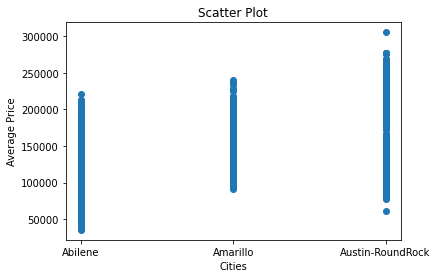

In [38]:
plt.scatter(df_clean['City/MSA'][1:1000], df_clean['AveragePrice'][1:1000])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Cities')
plt.ylabel('Average Price')
  
plt.show()

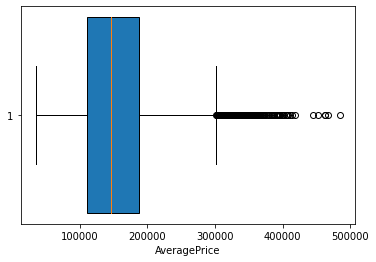

In [39]:
L2 = df_clean['AveragePrice']
plt.boxplot(L2, vert=False, manage_ticks = True, widths = 0.9, patch_artist = True, showfliers= True, )
plt.xlabel('AveragePrice')
plt.show()

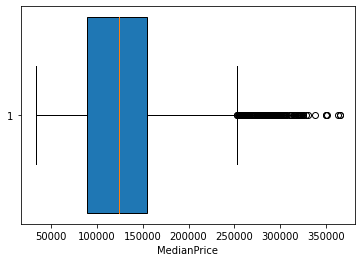

In [40]:
L2 = df_clean['MedianPrice']
plt.boxplot(L2, vert=False, manage_ticks = True, widths = 0.9, patch_artist = True, showfliers= True, )
plt.xlabel('MedianPrice')
plt.show()

<AxesSubplot:xlabel='City/MSA'>

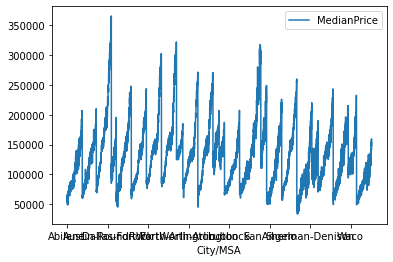

In [41]:
df_clean.plot( 'City/MSA' , 'MedianPrice' )

In [42]:
df_clean.to_csv('/Users/ML/housing_final.csv', index = False)